In [1]:
import matplotlib.pyplot as plt
import numpy as np
import re

The data below is extracted from the following terminal output

The reference implementation. To reproduce the results, please paste the terminal output into the following string.

In [2]:
reference = """
Considering power: 1:
Trial 1 for power 1 completed in 26.282605 seconds.
Trial 2 for power 1 completed in 28.671527 seconds.
Trial 3 for power 1 completed in 29.718433 seconds.
Trial 4 for power 1 completed in 30.546184 seconds.
Trial 5 for power 1 completed in 30.934050 seconds.
Trial 6 for power 1 completed in 30.429752 seconds.
Trial 7 for power 1 completed in 29.843324 seconds.
Trial 8 for power 1 completed in 29.409110 seconds.
Trial 9 for power 1 completed in 29.502668 seconds.
Trial 10 for power 1 completed in 29.463770 seconds.
Results for power 1:
Average squared error in singular values: 0.000000
Minimum squared error in singular values: 0.000000
Maximum squared error in singular values: 0.000000
Average squared error in left singular vectors: 0.000202
Minimum squared error in left singular vectors: 0.000191
Maximum squared error in left singular vectors: 0.000212
Average squared error in right singular vectors: 0.002016
Minimum squared error in right singular vectors: 0.001908
Maximum squared error in right singular vectors: 0.002124
Average berr: 1.962129e-15
Minimum berr: 1.902805e-15
Maximum berr: 2.011919e-15
Average max orthogonality error: 3.252764e-16
Minimum max orthogonality error: 3.233037e-16
Maximum max orthogonality error: 3.272360e-16
Average backward error: 5.713937e-15
Minimum backward error: 5.505162e-15
Maximum backward error: 6.062462e-15
Average number of iterations: 5.000000
Minimum number of iterations: 5.000000
Maximum number of iterations: 5.000000
Elapsed time for power 1: 294.833756 seconds.
Considering power: 2:
Trial 1 for power 2 completed in 30.355506 seconds.
Trial 2 for power 2 completed in 29.957027 seconds.
Trial 3 for power 2 completed in 30.185935 seconds.
Trial 4 for power 2 completed in 31.056871 seconds.
Trial 5 for power 2 completed in 31.460155 seconds.
Trial 6 for power 2 completed in 30.522936 seconds.
Trial 7 for power 2 completed in 30.549067 seconds.
Trial 8 for power 2 completed in 29.625747 seconds.
Trial 9 for power 2 completed in 29.537040 seconds.
Trial 10 for power 2 completed in 26.808802 seconds.
Results for power 2:
Average squared error in singular values: 0.000000
Minimum squared error in singular values: 0.000000
Maximum squared error in singular values: 0.000000
Average squared error in left singular vectors: 0.000199
Minimum squared error in left singular vectors: 0.000191
Maximum squared error in left singular vectors: 0.000214
Average squared error in right singular vectors: 0.001988
Minimum squared error in right singular vectors: 0.001912
Maximum squared error in right singular vectors: 0.002136
Average berr: 2.249767e-15
Minimum berr: 1.719740e-15
Maximum berr: 6.569151e-15
Average max orthogonality error: 3.337405e-16
Minimum max orthogonality error: 3.316292e-16
Maximum max orthogonality error: 3.359000e-16
Average backward error: 5.651923e-15
Minimum backward error: 5.378863e-15
Maximum backward error: 6.070258e-15
Average number of iterations: 5.000000
Minimum number of iterations: 5.000000
Maximum number of iterations: 5.000000
Elapsed time for power 2: 594.913598 seconds.
Considering power: 3:
Trial 1 for power 3 completed in 28.903387 seconds.
Trial 2 for power 3 completed in 33.263111 seconds.
Trial 3 for power 3 completed in 37.600270 seconds.
Trial 4 for power 3 completed in 33.830071 seconds.
Trial 5 for power 3 completed in 39.958155 seconds.
Trial 6 for power 3 completed in 39.580924 seconds.
Trial 7 for power 3 completed in 37.481598 seconds.
Trial 8 for power 3 completed in 32.945540 seconds.
Trial 9 for power 3 completed in 35.387301 seconds.
Trial 10 for power 3 completed in 38.315253 seconds.
Results for power 3:
Average squared error in singular values: 0.000000
Minimum squared error in singular values: 0.000000
Maximum squared error in singular values: 0.000000
Average squared error in left singular vectors: 0.000199
Minimum squared error in left singular vectors: 0.000184
Maximum squared error in left singular vectors: 0.000207
Average squared error in right singular vectors: 0.001986
Minimum squared error in right singular vectors: 0.001844
Maximum squared error in right singular vectors: 0.002068
Average berr: 3.247327e-15
Minimum berr: 1.747732e-15
Maximum berr: 9.944468e-15
Average max orthogonality error: 3.401190e-16
Minimum max orthogonality error: 3.375857e-16
Maximum max orthogonality error: 3.416235e-16
Average backward error: 5.810927e-15
Minimum backward error: 5.636024e-15
Maximum backward error: 6.249629e-15
Average number of iterations: 5.000000
Minimum number of iterations: 5.000000
Maximum number of iterations: 5.000000
Elapsed time for power 3: 952.195055 seconds.
"""

Our implementation. To reproduce the results, please paste the terminal output into the following string.

In [3]:
current = """ 
Considering power: 1:
Trial 1 for power 1 completed in 42.841428 seconds.
Trial 2 for power 1 completed in 43.713170 seconds.
Trial 3 for power 1 completed in 42.099561 seconds.
Trial 4 for power 1 completed in 44.367484 seconds.
Trial 5 for power 1 completed in 46.206549 seconds.
Trial 6 for power 1 completed in 45.589939 seconds.
Trial 7 for power 1 completed in 45.138281 seconds.
Trial 8 for power 1 completed in 46.028597 seconds.
Trial 9 for power 1 completed in 45.020235 seconds.
Trial 10 for power 1 completed in 49.485718 seconds.
Results for power 1:
Average squared error in singular values: 0.000000
Minimum squared error in singular values: 0.000000
Maximum squared error in singular values: 0.000000
Average squared error in left singular vectors: 0.000201
Minimum squared error in left singular vectors: 0.000194
Maximum squared error in left singular vectors: 0.000207
Average squared error in right singular vectors: 0.002005
Minimum squared error in right singular vectors: 0.001940
Maximum squared error in right singular vectors: 0.002068
Average berr: 2.276147e-15
Minimum berr: 2.236037e-15
Maximum berr: 2.331118e-15
Average max orthogonality error: 1.422713e-15
Minimum max orthogonality error: 1.401877e-15
Maximum max orthogonality error: 1.440901e-15
Average backward error: 1.747701e-12
Minimum backward error: 1.200427e-13
Maximum backward error: 1.126752e-11
Average number of iterations: 5.000000
Minimum number of iterations: 5.000000
Maximum number of iterations: 5.000000
Elapsed time for power 1: 450.511976 seconds.
Considering power: 2:
Trial 1 for power 2 completed in 50.811207 seconds.
Trial 2 for power 2 completed in 49.379572 seconds.
Trial 3 for power 2 completed in 49.088688 seconds.
Trial 4 for power 2 completed in 48.698802 seconds.
Trial 5 for power 2 completed in 47.804041 seconds.
Trial 6 for power 2 completed in 48.474526 seconds.
Trial 7 for power 2 completed in 49.009258 seconds.
Trial 8 for power 2 completed in 46.034856 seconds.
Trial 9 for power 2 completed in 46.321956 seconds.
Trial 10 for power 2 completed in 49.070053 seconds.
Results for power 2:
Average squared error in singular values: 0.000000
Minimum squared error in singular values: 0.000000
Maximum squared error in singular values: 0.000000
Average squared error in left singular vectors: 0.000199
Minimum squared error in left singular vectors: 0.000192
Maximum squared error in left singular vectors: 0.000207
Average squared error in right singular vectors: 0.001994
Minimum squared error in right singular vectors: 0.001920
Maximum squared error in right singular vectors: 0.002072
Average berr: 2.175404e-15
Minimum berr: 2.116220e-15
Maximum berr: 2.311886e-15
Average max orthogonality error: 1.481226e-15
Minimum max orthogonality error: 1.466298e-15
Maximum max orthogonality error: 1.494049e-15
Average backward error: 2.115929e-12
Minimum backward error: 3.906719e-13
Maximum backward error: 8.702195e-12
Average number of iterations: 5.000000
Minimum number of iterations: 5.000000
Maximum number of iterations: 5.000000
Elapsed time for power 2: 935.219146 seconds.
Considering power: 3:
Trial 1 for power 3 completed in 45.100695 seconds.
Trial 2 for power 3 completed in 45.798236 seconds.
Trial 3 for power 3 completed in 44.245401 seconds.
Trial 4 for power 3 completed in 44.580948 seconds.
Trial 5 for power 3 completed in 43.552749 seconds.
Trial 6 for power 3 completed in 48.406186 seconds.
Trial 7 for power 3 completed in 35.752201 seconds.
Trial 8 for power 3 completed in 33.701036 seconds.
Trial 9 for power 3 completed in 33.275711 seconds.
Trial 10 for power 3 completed in 32.548535 seconds.
Results for power 3:
Average squared error in singular values: 0.000000
Minimum squared error in singular values: 0.000000
Maximum squared error in singular values: 0.000000
Average squared error in left singular vectors: 0.000202
Minimum squared error in left singular vectors: 0.000190
Maximum squared error in left singular vectors: 0.000207
Average squared error in right singular vectors: 0.002018
Minimum squared error in right singular vectors: 0.001904
Maximum squared error in right singular vectors: 0.002072
Average berr: 2.154215e-15
Minimum berr: 2.053408e-15
Maximum berr: 2.258389e-15
Average max orthogonality error: 1.535276e-15
Minimum max orthogonality error: 1.513598e-15
Maximum max orthogonality error: 1.547512e-15
Average backward error: 3.405713e-12
Minimum backward error: 5.725020e-13
Maximum backward error: 8.513600e-12
Average number of iterations: 5.000000
Minimum number of iterations: 5.000000
Maximum number of iterations: 5.000000
Elapsed time for power 3: 1342.192171 seconds.
"""

In [4]:
def extract_metrics(data_str):
    powers_data = data_str.strip().split('Considering power:')
    powers_data = [p.strip() for p in powers_data if p]
    
    avg_sq_err_lsv, min_sq_err_lsv, max_sq_err_lsv = [], [], []
    avg_sq_err_rsv, min_sq_err_rsv, max_sq_err_rsv = [], [], []
    avg_berr, min_berr, max_berr = [], [], []
    avg_max_orth_err, min_max_orth_err, max_max_orth_err = [], [], []
    avg_backward_err, min_backward_err, max_backward_err = [], [], []
    avg_iterations, min_iterations, max_iterations = [], [], []
    elapsed_times = []
    elapsed_times_min = []
    elapsed_times_max = []
    
    for power_data in powers_data:
        trials = re.findall(r'Trial \d+ for power \d+ completed in ([\d.]+) seconds.', power_data)
        trials = [float(t) for t in trials]
        
        results = re.search(r'Results for power \d+:(.*)', power_data, re.DOTALL).group(1)
        
        avg_sq_err_lsv.append(float(re.search(r'Average squared error in left singular vectors: ([\d.e+-]+)', results).group(1)))
        min_sq_err_lsv.append(float(re.search(r'Minimum squared error in left singular vectors: ([\d.e+-]+)', results).group(1)))
        max_sq_err_lsv.append(float(re.search(r'Maximum squared error in left singular vectors: ([\d.e+-]+)', results).group(1)))
        
        avg_sq_err_rsv.append(float(re.search(r'Average squared error in right singular vectors: ([\d.e+-]+)', results).group(1)))
        min_sq_err_rsv.append(float(re.search(r'Minimum squared error in right singular vectors: ([\d.e+-]+)', results).group(1)))
        max_sq_err_rsv.append(float(re.search(r'Maximum squared error in right singular vectors: ([\d.e+-]+)', results).group(1)))
        
        avg_berr.append(float(re.search(r'Average berr: ([\d.e+-]+)', results).group(1)))
        min_berr.append(float(re.search(r'Minimum berr: ([\d.e+-]+)', results).group(1)))
        max_berr.append(float(re.search(r'Maximum berr: ([\d.e+-]+)', results).group(1)))
        
        avg_max_orth_err.append(float(re.search(r'Average max orthogonality error: ([\d.e+-]+)', results).group(1)))
        min_max_orth_err.append(float(re.search(r'Minimum max orthogonality error: ([\d.e+-]+)', results).group(1)))
        max_max_orth_err.append(float(re.search(r'Maximum max orthogonality error: ([\d.e+-]+)', results).group(1)))
        
        avg_backward_err.append(float(re.search(r'Average backward error: ([\d.e+-]+)', results).group(1)))
        min_backward_err.append(float(re.search(r'Minimum backward error: ([\d.e+-]+)', results).group(1)))
        max_backward_err.append(float(re.search(r'Maximum backward error: ([\d.e+-]+)', results).group(1)))
        
        avg_iterations.append(float(re.search(r'Average number of iterations: ([\d.e+-]+)', results).group(1)))
        min_iterations.append(float(re.search(r'Minimum number of iterations: ([\d.e+-]+)', results).group(1)))
        max_iterations.append(float(re.search(r'Maximum number of iterations: ([\d.e+-]+)', results).group(1)))
        
        elapsed_times.append(np.mean(trials))
        elapsed_times_min.append(min(trials))
        elapsed_times_max.append(max(trials))
    
    return {
        'avg_sq_err_lsv': avg_sq_err_lsv,
        'min_sq_err_lsv': min_sq_err_lsv,
        'max_sq_err_lsv': max_sq_err_lsv,
        'avg_sq_err_rsv': avg_sq_err_rsv,
        'min_sq_err_rsv': min_sq_err_rsv,
        'max_sq_err_rsv': max_sq_err_rsv,
        'avg_berr': avg_berr,
        'min_berr': min_berr,
        'max_berr': max_berr,
        'avg_max_orth_err': avg_max_orth_err,
        'min_max_orth_err': min_max_orth_err,
        'max_max_orth_err': max_max_orth_err,
        'avg_backward_err': avg_backward_err,
        'min_backward_err': min_backward_err,
        'max_backward_err': max_backward_err,
        'avg_iterations': avg_iterations,
        'min_iterations': min_iterations,
        'max_iterations': max_iterations,
        'elapsed_times': elapsed_times,
        'elapsed_times_min': elapsed_times_min,
        'elapsed_times_max': elapsed_times_max,
    }

In [5]:
def plot_side_by_side(ax, x, y1_mean, y1_err, y2_mean, y2_err, label1, label2):
    # Plot the error bars for y1
    ax.errorbar(x - 0.1, y1_mean, yerr=y1_err, fmt='o', capsize=5, label=label1, color='blue')

    # Plot the error bars for y2
    ax.errorbar(x + 0.1, y2_mean, yerr=y2_err, fmt='o', capsize=5, label=label2, color='green')

    # Set xticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(x)

    # Add legend
    ax.legend()

In [6]:
# Placeholder for the extracted metrics
metrics = extract_metrics(current)  # Assuming data_str is the provided data string

# Unpacking the extracted metrics
avg_sq_err_lsv = metrics['avg_sq_err_lsv']
min_sq_err_lsv = metrics['min_sq_err_lsv']
max_sq_err_lsv = metrics['max_sq_err_lsv']

avg_sq_err_rsv = metrics['avg_sq_err_rsv']
min_sq_err_rsv = metrics['min_sq_err_rsv']
max_sq_err_rsv = metrics['max_sq_err_rsv']

avg_berr = metrics['avg_berr']
min_berr = metrics['min_berr']
max_berr = metrics['max_berr']

avg_max_orth_err = metrics['avg_max_orth_err']
min_max_orth_err = metrics['min_max_orth_err']
max_max_orth_err = metrics['max_max_orth_err']

avg_backward_err = metrics['avg_backward_err']
min_backward_err = metrics['min_backward_err']
max_backward_err = metrics['max_backward_err']

avg_iterations = metrics['avg_iterations']
min_iterations = metrics['min_iterations']
max_iterations = metrics['max_iterations']

elapsed_time_blue_min = metrics['elapsed_times_min']
elapsed_time_blue_max = metrics['elapsed_times_max']
elapsed_time_blue_avg = metrics['elapsed_times']
elapsed_time_blue_err = [np.subtract(elapsed_time_blue_avg, elapsed_time_blue_min), np.subtract(elapsed_time_blue_max, elapsed_time_blue_avg)]

# Placeholder for the new metrics (current implementation)
# Assuming new_metrics is the new data extracted similarly
new_metrics = extract_metrics(reference)  # Assuming new_data_str is the provided new data string

new_avg_sq_err_lsv = new_metrics['avg_sq_err_lsv']
new_min_sq_err_lsv = new_metrics['min_sq_err_lsv']
new_max_sq_err_lsv = new_metrics['max_sq_err_lsv']

new_avg_sq_err_rsv = new_metrics['avg_sq_err_rsv']
new_min_sq_err_rsv = new_metrics['min_sq_err_rsv']
new_max_sq_err_rsv = new_metrics['max_sq_err_rsv']

new_avg_berr = new_metrics['avg_berr']
new_min_berr = new_metrics['min_berr']
new_max_berr = new_metrics['max_berr']

new_avg_max_orth_err = new_metrics['avg_max_orth_err']
new_min_max_orth_err = new_metrics['min_max_orth_err']
new_max_max_orth_err = new_metrics['max_max_orth_err']

new_avg_backward_err = new_metrics['avg_backward_err']
new_min_backward_err = new_metrics['min_backward_err']
new_max_backward_err = new_metrics['max_backward_err']

new_avg_iterations = new_metrics['avg_iterations']
new_min_iterations = new_metrics['min_iterations']
new_max_iterations = new_metrics['max_iterations']

elapsed_time_green_min = new_metrics['elapsed_times_min']
elapsed_time_green_max = new_metrics['elapsed_times_max']
elapsed_time_green_avg = new_metrics['elapsed_times']
elapsed_time_green_err = [np.subtract(elapsed_time_green_avg, elapsed_time_green_min), np.subtract(elapsed_time_green_max, elapsed_time_green_avg)]
condition_numbers_log = [3, 6, 9]
indices = np.array(condition_numbers_log)

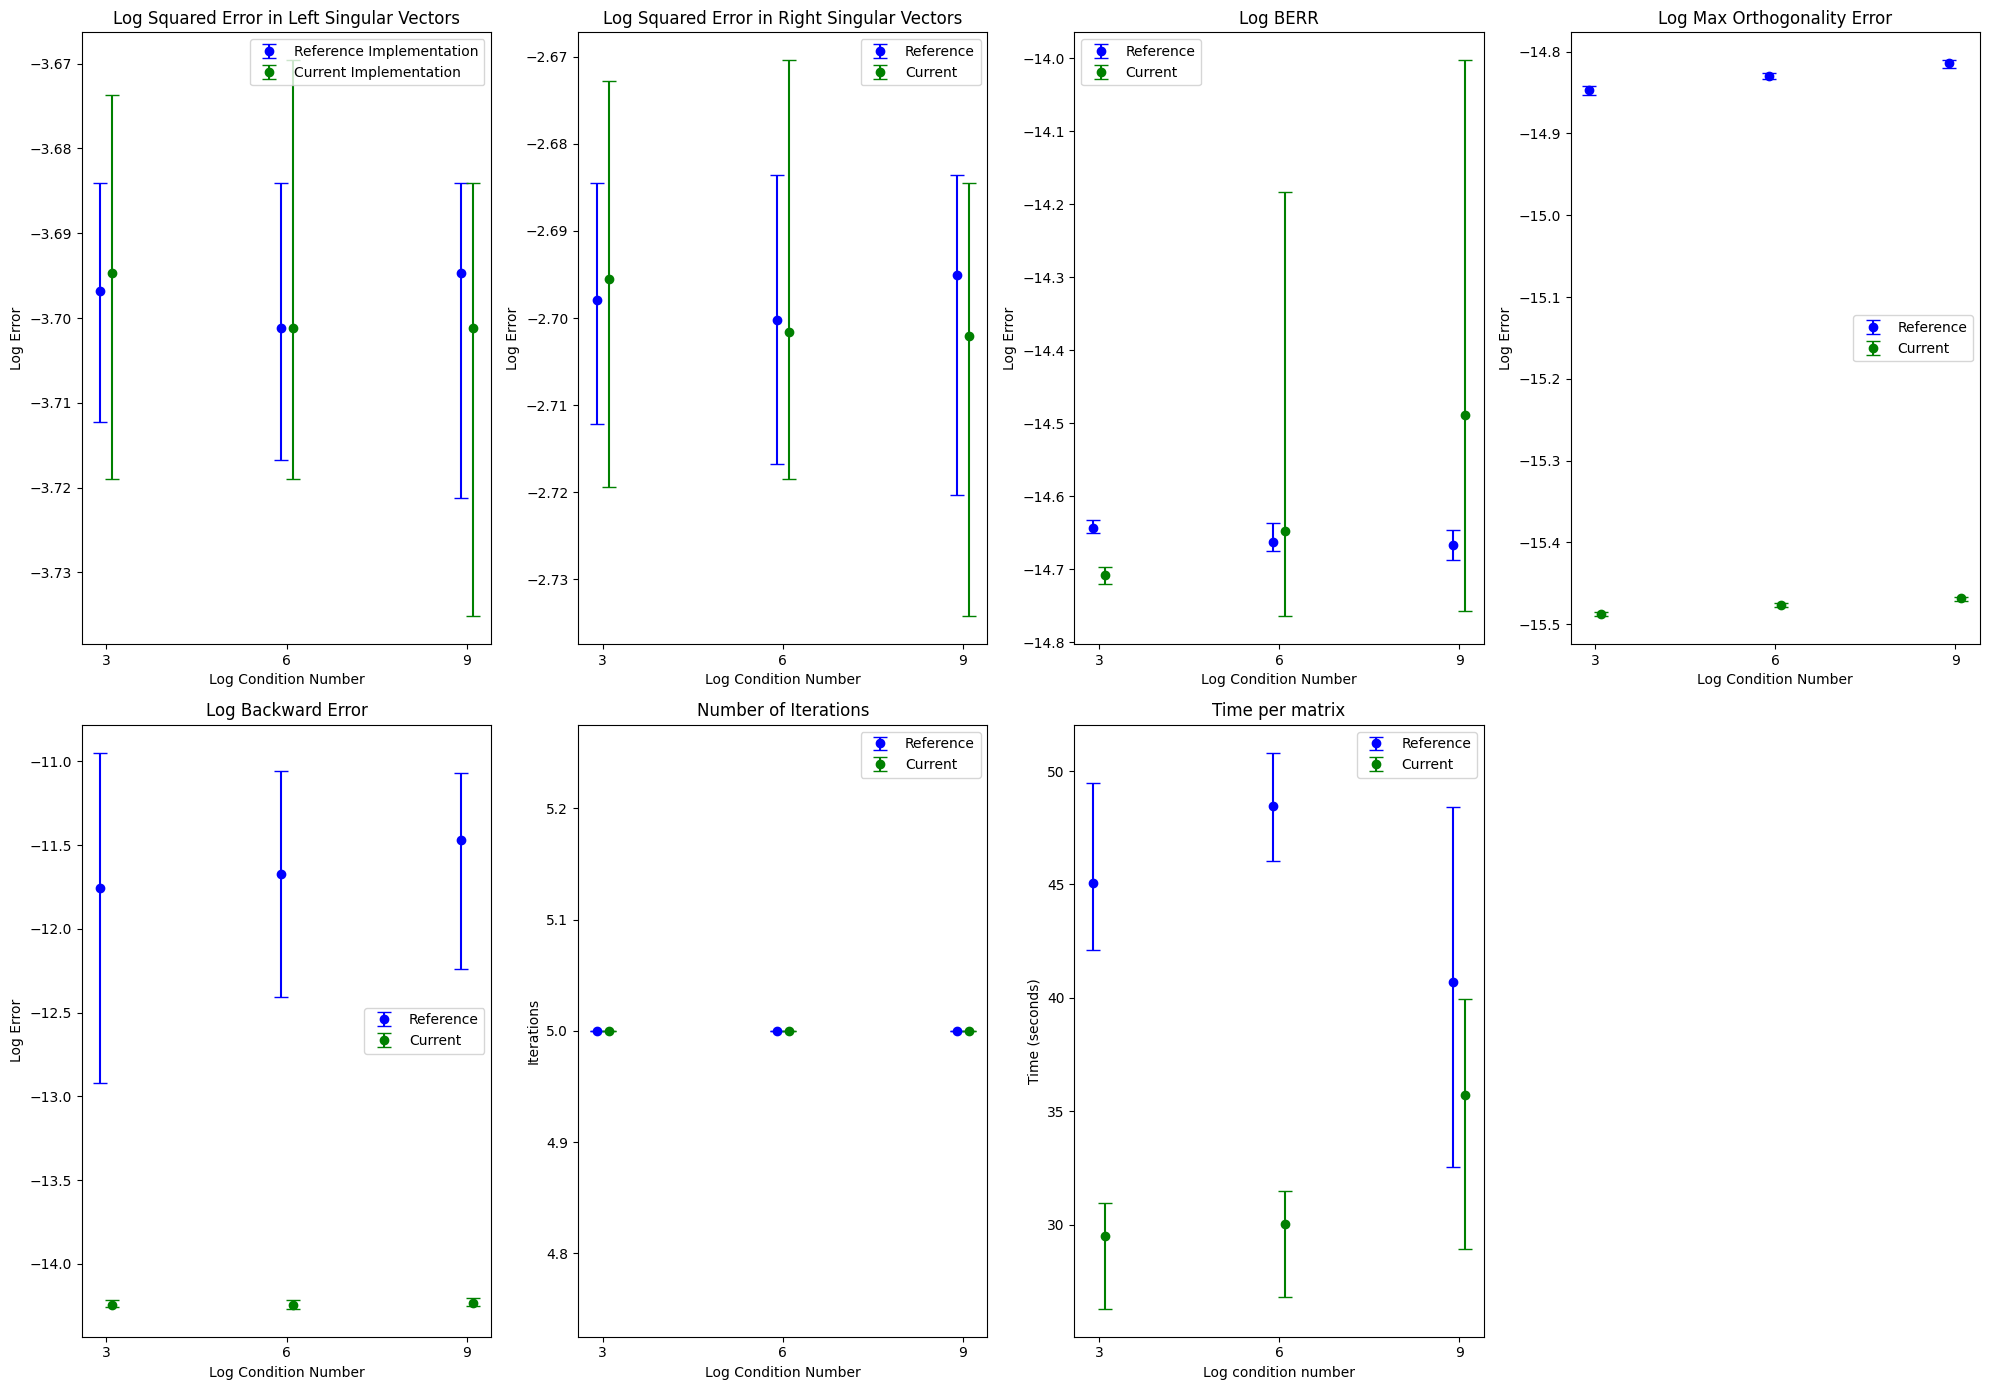

In [7]:
# Create subplots with an additional plot for number of iterations and elapsed time
fig, axs = plt.subplots(2, 4, figsize=(20, 14))



# Plotting with error bars in logarithmic scale (excluding singular values errors)
plot_side_by_side(axs[0, 0], indices, np.log10(avg_sq_err_lsv), [np.subtract(np.log10(avg_sq_err_lsv), np.log10(min_sq_err_lsv)), np.subtract(np.log10(max_sq_err_lsv), np.log10(avg_sq_err_lsv))], 
                  np.log10(new_avg_sq_err_lsv), [np.subtract(np.log10(new_avg_sq_err_lsv), np.log10(new_min_sq_err_lsv)), np.subtract(np.log10(new_max_sq_err_lsv), np.log10(new_avg_sq_err_lsv))],
                  'Reference', 'Current')
axs[0, 0].set_title('Log Squared Error in Left Singular Vectors')
axs[0, 0].set_ylabel('Log Error')
axs[0, 0].set_xlabel('Log Condition Number')
axs[0, 0].legend()

plot_side_by_side(axs[0, 1], indices, np.log10(avg_sq_err_rsv), [np.subtract(np.log10(avg_sq_err_rsv), np.log10(min_sq_err_rsv)), np.subtract(np.log10(max_sq_err_rsv), np.log10(avg_sq_err_rsv))], 
                  np.log10(new_avg_sq_err_rsv), [np.subtract(np.log10(new_avg_sq_err_rsv), np.log10(new_min_sq_err_rsv)), np.subtract(np.log10(new_max_sq_err_rsv), np.log10(new_avg_sq_err_rsv))],
                  'Reference', 'Current')
axs[0, 1].set_title('Log Squared Error in Right Singular Vectors')
axs[0, 1].set_ylabel('Log Error')
axs[0, 1].set_xlabel('Log Condition Number')
axs[0, 1].legend()

plot_side_by_side(axs[0, 2], indices, np.log10(avg_berr), [np.subtract(np.log10(avg_berr), np.log10(min_berr)), np.subtract(np.log10(max_berr), np.log10(avg_berr))], 
                  np.log10(new_avg_berr), [np.subtract(np.log10(new_avg_berr), np.log10(new_min_berr)), np.subtract(np.log10(new_max_berr), np.log10(new_avg_berr))],
                  'Reference', 'Current')
axs[0, 2].set_title('Log BERR')
axs[0, 2].set_ylabel('Log Error')
axs[0, 2].set_xlabel('Log Condition Number')
axs[0, 2].legend()

plot_side_by_side(axs[0, 3], indices, np.log10(avg_max_orth_err), [np.subtract(np.log10(avg_max_orth_err), np.log10(min_max_orth_err)), np.subtract(np.log10(max_max_orth_err), np.log10(avg_max_orth_err))], 
                  np.log10(new_avg_max_orth_err), [np.subtract(np.log10(new_avg_max_orth_err), np.log10(new_min_max_orth_err)), np.subtract(np.log10(new_max_max_orth_err), np.log10(new_avg_max_orth_err))],
                  'Reference', 'Current')
axs[0, 3].set_title('Log Max Orthogonality Error')
axs[0, 3].set_ylabel('Log Error')
axs[0, 3].set_xlabel('Log Condition Number')
axs[0, 3].legend()

plot_side_by_side(axs[1, 0], indices, np.log10(avg_backward_err), [np.subtract(np.log10(avg_backward_err), np.log10(min_backward_err)), np.subtract(np.log10(max_backward_err), np.log10(avg_backward_err))], 
                  np.log10(new_avg_backward_err), [np.subtract(np.log10(new_avg_backward_err), np.log10(new_min_backward_err)), np.subtract(np.log10(new_max_backward_err), np.log10(new_avg_backward_err))],
                  'Reference', 'Current')
axs[1, 0].set_title('Log Backward Error')
axs[1, 0].set_ylabel('Log Error')
axs[1, 0].set_xlabel('Log Condition Number')
axs[1, 0].legend()

# Plotting number of iterations without log
plot_side_by_side(axs[1, 1], indices, avg_iterations, [np.subtract(avg_iterations, min_iterations), np.subtract(max_iterations, avg_iterations)], 
                  new_avg_iterations, [np.subtract(new_avg_iterations, new_min_iterations), np.subtract(new_max_iterations, new_avg_iterations)],
                  'Reference', 'Current')
axs[1, 1].set_title('Number of Iterations')
axs[1, 1].set_ylabel('Iterations')
axs[1, 1].set_xlabel('Log Condition Number')
axs[1, 1].legend()

# # Plotting elapsed time
# axs[1, 2].plot(batches_processed, elapsed_time_green, 'go-', label='Current Implementation')
# axs[1, 2].plot(batches_processed, elapsed_time_blue, 'bo-', label='Reference Implementation')
# axs[1, 2].set_title('Total Elapsed Time')
# axs[1, 2].set_ylabel('Time (seconds)')
# axs[1, 2].set_xlabel('Number of batches processed')
# axs[1, 2].legend()

plot_side_by_side(axs[1, 2], indices, elapsed_time_blue_avg, elapsed_time_blue_err, elapsed_time_green_avg, elapsed_time_green_err, 'Reference', 'Current')
axs[1, 2].set_title('Time per matrix')
axs[1, 2].set_ylabel('Time (seconds)')
axs[1, 2].set_xlabel('Log condition number')
axs[1, 2].legend()
fig.delaxes(axs[1, 3])

# Add legend
axs[0, 0].legend(['Reference Implementation', 'Current Implementation'], loc='upper right')

plt.tight_layout()
plt.savefig('./figures/metrics_5_matrices_10k_1k_no_cumulative.png', format='png', dpi=300)
plt.show()
